In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

In [4]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('.../GitHub/Data_Enrichment-Core-Assessments/Data/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

1.Null Hypothesis (H0): The mean insurance charges for smokers are equal to the mean insurance charges for non-smokers.

Alternative Hypothesis (H1): The mean insurance charges for smokers are not equal to the mean insurance charges for non-smokers.

 2.Two-sample t-test to compare the means of insurance charges between smokers and non-smokers.

Reject the null hypothesis


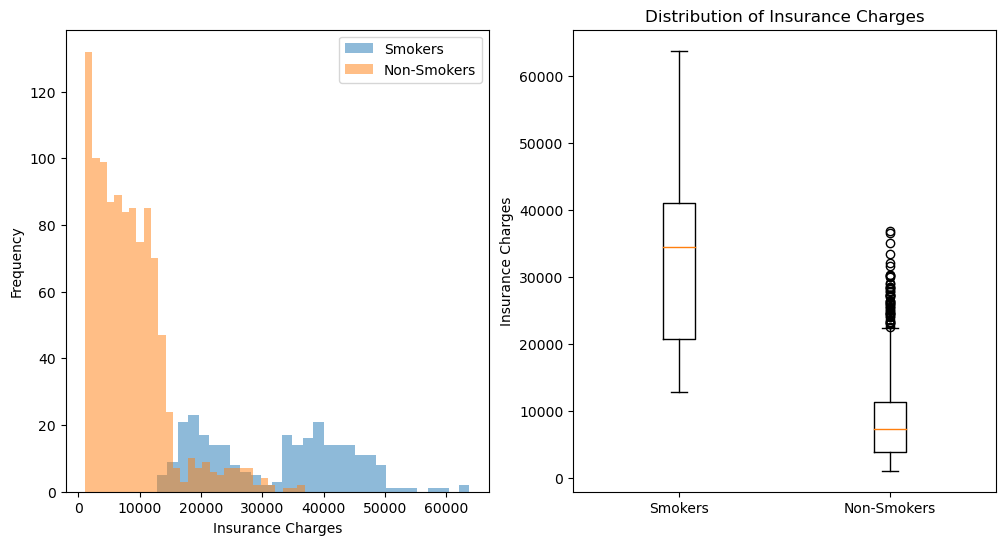

In [5]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

# Check assumptions
# Visualize the distributions (histograms)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(smokers_charges, bins=30, alpha=0.5, label='Smokers')
plt.hist(non_smokers_charges, bins=30, alpha=0.5, label='Non-Smokers')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.legend()

# Perform t-test (assuming equal variances)
t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=True)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Boxplot for visualization
plt.subplot(1, 2, 2)
plt.boxplot([smokers_charges, non_smokers_charges], labels=['Smokers', 'Non-Smokers'])
plt.ylabel('Insurance Charges')
plt.title('Distribution of Insurance Charges')
plt.show()


Reject the null hypothesis

# Q2. Are men more likely to smoke than women?

1- Null Hypothesis (H0): The proportion of men who smoke is equal to the proportion of women who smoke.

Alternative Hypothesis (H1): The proportion of men who smoke is not equal to the proportion of women who smoke.

2 - chi-squared test for independence

Reject the null hypothesis


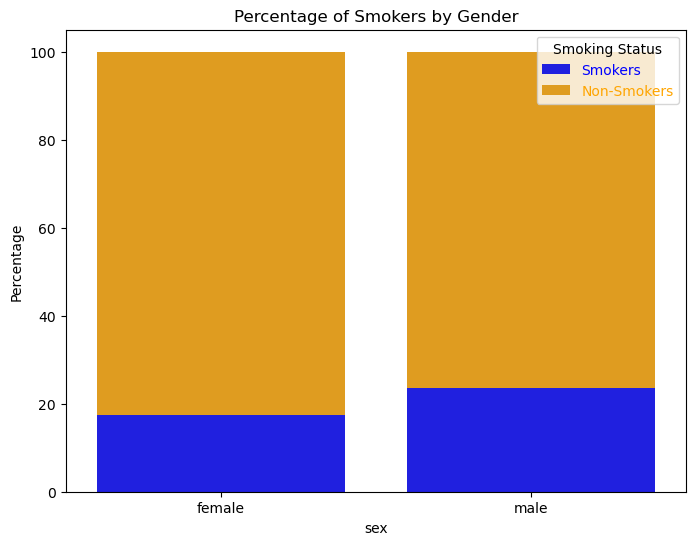

In [8]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Check assumptions
# Ensure that each cell has an expected frequency of at least 5
expected_freq = stats.contingency.expected_freq(contingency_table)
if (expected_freq >= 5).all():
    # Perform the chi-squared test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

    # Create a stacked bar chart for visualization
    contingency_table['Total'] = contingency_table.sum(axis=1)
    contingency_table_percentage = (contingency_table.div(contingency_table['Total'], axis=0) * 100).drop(columns='Total')

  # Define custom colors for the legend
    custom_colors = ['blue', 'orange']

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=contingency_table_percentage.index, y=contingency_table_percentage['yes'], label='Smokers', color=custom_colors[0])
    sns.barplot(x=contingency_table_percentage.index, y=contingency_table_percentage['no'], label='Non-Smokers', color=custom_colors[1], bottom=contingency_table_percentage['yes'])
    plt.ylabel('Percentage')
    plt.title('Percentage of Smokers by Gender')
    
    # Create a custom legend
    custom_legend = plt.legend(title='Smoking Status', loc='upper right')
    for i, text in enumerate(custom_legend.get_texts()):
        text.set_color(custom_colors[i])
    
    plt.show()
else:
    print("Assumption of sufficient sample size not met. Adjust your data or choose another test.")

Reject the null hypothesis

# Q3. Do different regions have different charges, on average?

Null Hypothesis (H0): The mean insurance charges are the same across all regions.

Alternative Hypothesis (H1): The mean insurance charges are not the same across all regions.

I will use analysis of variance (ANOVA) to compare the means of insurance charges across different regions because I'm comparing more than two groups.

Reject the null hypothesis


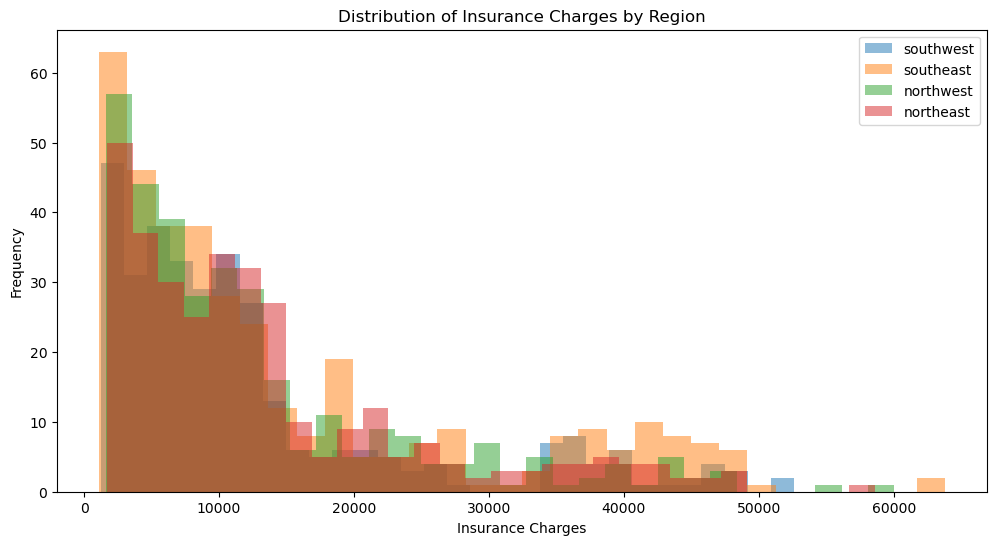

In [9]:
regions = df['region'].unique()

# Check assumptions
# Visualize the distributions (histograms)
plt.figure(figsize=(12, 6))
for region in regions:
    data = df[df['region'] == region]['charges']
    plt.hist(data, bins=30, alpha=0.5, label=region)

plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Insurance Charges by Region')

# Perform ANOVA test
region_groups = [df[df['region'] == region]['charges'] for region in regions]
_, p_value = stats.f_oneway(*region_groups)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

plt.show()


Reject the null hypothesis